# Contents List

01. Import libraries and data
02. Sample charts 
03. Create order_hour_of_day histogram
04. Create loyalty flag bar chart
05. Graph sample of prices by hour of day
06. Create line graph of age and number of dependants
07. Create scatterplot of age and income

Bonus: Plot total spending by hour of day

# 01. Import libraries and data

In [1]:
# import libraries (including ones you need for data viz)
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create shortcut for data imports
path = r'C:\Users\jacym\Desktop\Career Foundry projects\04-2023 Instacart basket analysis'

In [4]:
# import data
df = pd.read_pickle(r'C:\Users\jacym\Desktop\Career Foundry projects\04-2023 Instacart basket analysis\02 Data\Prepared data\orders_customers_merged.pkl')

In [4]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df.shape

(32404859, 29)

# 02. See practice notebook for sample charts

# 03. Create a histogram of the “order_hour_of_day” column

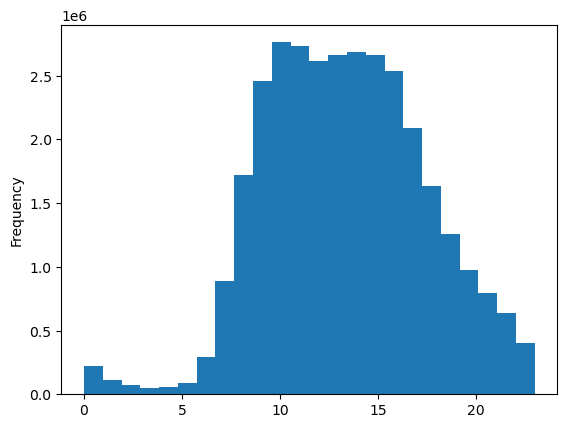

In [8]:
# Create a histogram of the “order_hour_of_day” column.
hist = df['order_hour_of_day'].plot.hist(bins = 24)

Observations: 

In [9]:
# export chart as png
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day.png'))

# 04. Create a bar chart from the “loyalty_flag” column

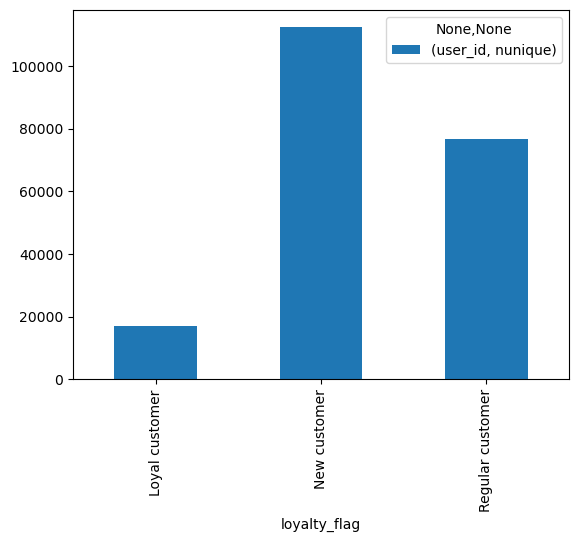

In [5]:
# Create a bar chart from the “loyalty_flag” column.
bar = df.groupby(['loyalty_flag'], dropna = False).agg({'user_id': ['nunique']}).plot.bar()

In [12]:
# export chart as png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

# 05. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day
Hint: To check this, you need to use an accurate sample for your line chart!

In [6]:
# create a random number pattern and label it with whatever number you want 
np.random.seed(3)

In [7]:
# create a rule that assigns a binary value to each row depending on whether it's lesser than/equal to .7 (70% of data) or greater than .7 (30% of data)
dev = np.random.rand(len(df)) <= 0.7

In [8]:
dev

array([ True, False,  True, ...,  True,  True,  True])

In [9]:
# name our True values (70% of the data frame) 'big'
big = df[dev]

In [10]:
# the smaller subsection will appropriately be named 'small.' This is the sample we're going to work with
small = df[~dev]

In [11]:
# check length of whole df and big + small to make sure the divide worked
len(df)

32404859

In [12]:
len(big) + len(small)

32404859

In [13]:
# now define our sample: small subsection, and only the columns you need for your chart
df_hour_prices = small[['order_hour_of_day', 'prices']]

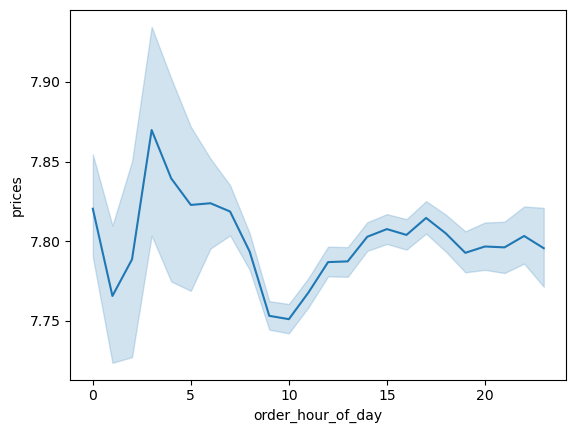

In [14]:
# create a line chart with the sample
line = sns.lineplot(data = df_hour_prices, x = 'order_hour_of_day',y = 'prices')

Observations: Average item prices are higher in the morning, peaking between 3 a.m. and 7 a.m. 

Investigating the y-axis -- what is it measuring? Sum, average?

In [33]:
# view descriptive statistics... mean price looks similar to y-axis values
df_hour_prices.describe()

,order_hour_of_day,prices
count,9.722000e+06,9.722000e+06
mean,1.342623e+01,7.790013e+00
std,4.245552e+00,4.220889e+00
min,0.000000e+00,9.900000e-01
25%,1.000000e+01,4.200000e+00
50%,1.300000e+01,7.400000e+00
75%,1.600000e+01,1.130000e+01
max,2.300000e+01,2.500000e+01


In [38]:
# view sum of each column
df_hour_prices.sum(axis=0)

order_hour_of_day    130529834.0
prices                75734504.0
dtype: float64

In [39]:
# view sum for a given hour -- this value isn't on the line chart for 10, so it must be tracking the average
df_hour_prices.loc[df_hour_prices['order_hour_of_day'] == 10, 'prices'].sum()

6420576.5

Compare small sample line chart to big sample line chart

In [30]:
df_hour_prices_big = big[['order_hour_of_day', 'prices']]

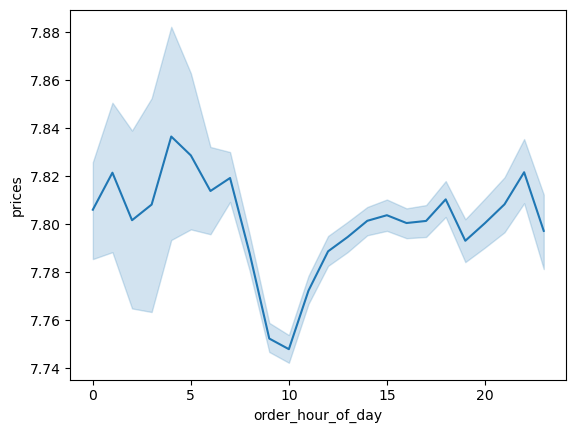

In [31]:
line_big = sns.lineplot(data = df_hour_prices_big, x = 'order_hour_of_day',y = 'prices')

Exporting this one because it's fairly dfferent from the smaller sample, and I'd rather use the chart based on more data.

In [32]:
# export chart as png
line_big.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_of_day.png'))

# 06. Create a line chart exploring the connections between age and number of dependents

In [21]:
# Create subset with only unique customers
df_customers = df.drop_duplicates(subset=['user_id'], keep='first') 

In [22]:
df_customers.shape

(206209, 29)

In [23]:
df_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
59,2968173,15,15,1,9,7.0,196,2,0,Soda,...,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313
131,2293453,19,2,5,14,6.0,196,3,0,Soda,...,Low spender,6.0,Frequent customer,Female,Louisiana,62,2/3/2017,1,married,151988
335,1573906,21,10,3,10,6.0,196,2,0,Soda,...,Low spender,7.5,Frequent customer,Male,Montana,71,6/18/2019,0,divorced/widowed,124643
540,1593000,31,10,3,8,7.0,196,17,0,Soda,...,Low spender,6.0,Frequent customer,Female,Oklahoma,38,1/22/2019,1,married,52311


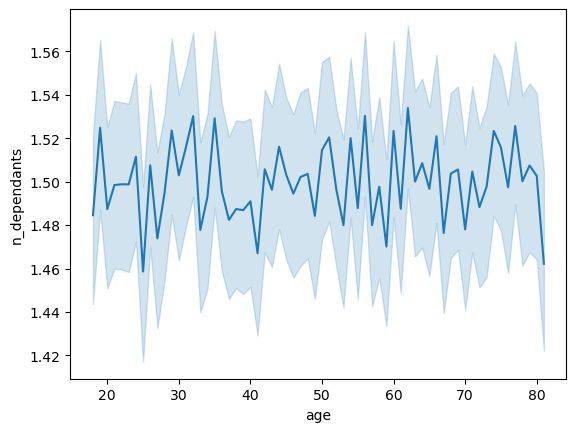

In [24]:
line_age_deps = sns.lineplot(data = df_customers, x = 'age',y = 'n_dependants')

Observations: I see no clear relationship between age and number of dependants.

In [27]:
# export chart as png
line_age_deps.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_deps.png'))

# 07. Create a scatterplot showing relationship between age and income

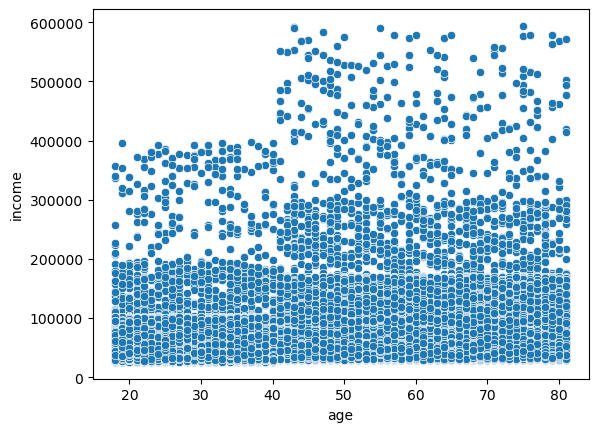

In [28]:
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_customers)

Observations: Most people make under 200k regardless of age, but there's a higher concentration of people making more than that over age 40, and virtually everyone over the 400k mark is older than 40.

In [29]:
# export chart as png
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

# Bonus: Plot total spending by hour of day

In [40]:
df.groupby('order_hour_of_day')

In [42]:
# group by hour of day, sum prices for each hour
hourly_spending = df.groupby('order_hour_of_day').agg({'prices': ['sum']})

In [43]:
# export this as a csv (there must be a faster way to do this!)
hourly_spending.to_csv(os.path.join(path, '02 Data','Prepared Data', 'hourly_spending.csv'))

In [92]:
# import
df_hourly_spending = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'hourly_spending.csv'))

In [93]:
# drop weird extra rows
df_hourly_spending = df_hourly_spending.drop([0,1], axis=0)

In [94]:
# check
df_hourly_spending

,Unnamed: 0,prices
2,0,1708666.4
3,1,903012.8
4,2,540974.1
5,3,401349.97
6,4,417279.4
7,5,688464.25
8,6,2270741.8
9,7,6967239.0
10,8,13383382.0
11,9,19026526.0


In [95]:
# rename unnammed column
df_hourly_spending = df_hourly_spending.rename(columns={'Unnamed: 0': 'hour'})

In [96]:
# rename prices column 
df_hourly_spending = df_hourly_spending.rename(columns={'prices': 'total_spending'})

In [97]:
# check
df_hourly_spending

,hour,total_spending
2,0,1708666.4
3,1,903012.8
4,2,540974.1
5,3,401349.97
6,4,417279.4
7,5,688464.25
8,6,2270741.8
9,7,6967239.0
10,8,13383382.0
11,9,19026526.0


In [98]:
# change data types - both columns stored as objects and couldn't be plotted
df_hourly_spending['hour'] = df_hourly_spending['hour'].astype('int')

In [100]:
# pandas wouldn't let me store prices as integer, so I converted it to float first, then int
df_hourly_spending['total_spending'] = df_hourly_spending['total_spending'].astype('float')

In [101]:
df_hourly_spending['total_spending'] = df_hourly_spending['total_spending'].astype('int')


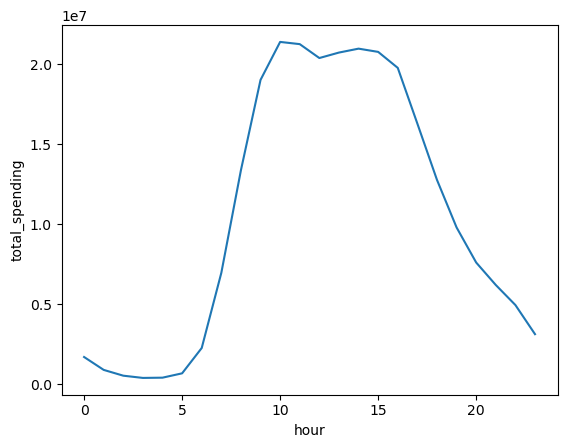

In [102]:
line_hourly_spending = sns.lineplot(data = df_hourly_spending, x = 'hour',y = 'total_spending')

In [103]:
# export chart as png
line_hourly_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hourly_spending.png'))